In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## Why Use a Computer Simulation
* To provide counterexamples to proposed theorems
* to build intuition by experimenting with random numbers
* to lend evidence to a conjecture

Conjecture: an opinion or conclusion formed on the basis of incomplete information

### What are the probabilities of summed outcomes on k random experiments?
U1 <- [0,1]
U2 <- [0,1]
U1 + U2 <- [0,2]

Based on the below simulation, we observe that is far more likely that the values are around 1 rather than at 0 or 2.
For the value of U1 + U2 to be near 0 or 2 both of them should be near 0 or 2 at once. Where as for the value to be near 1 there is more flexibility - (0.5, 0.5) , (0,75, 0.25), (0.2, 0.8)

If we add more and more random experiments, we will obtain a Gaussian-shaped histogram - intuition for Central Limit Theorem

<IPython.core.display.Javascript object>


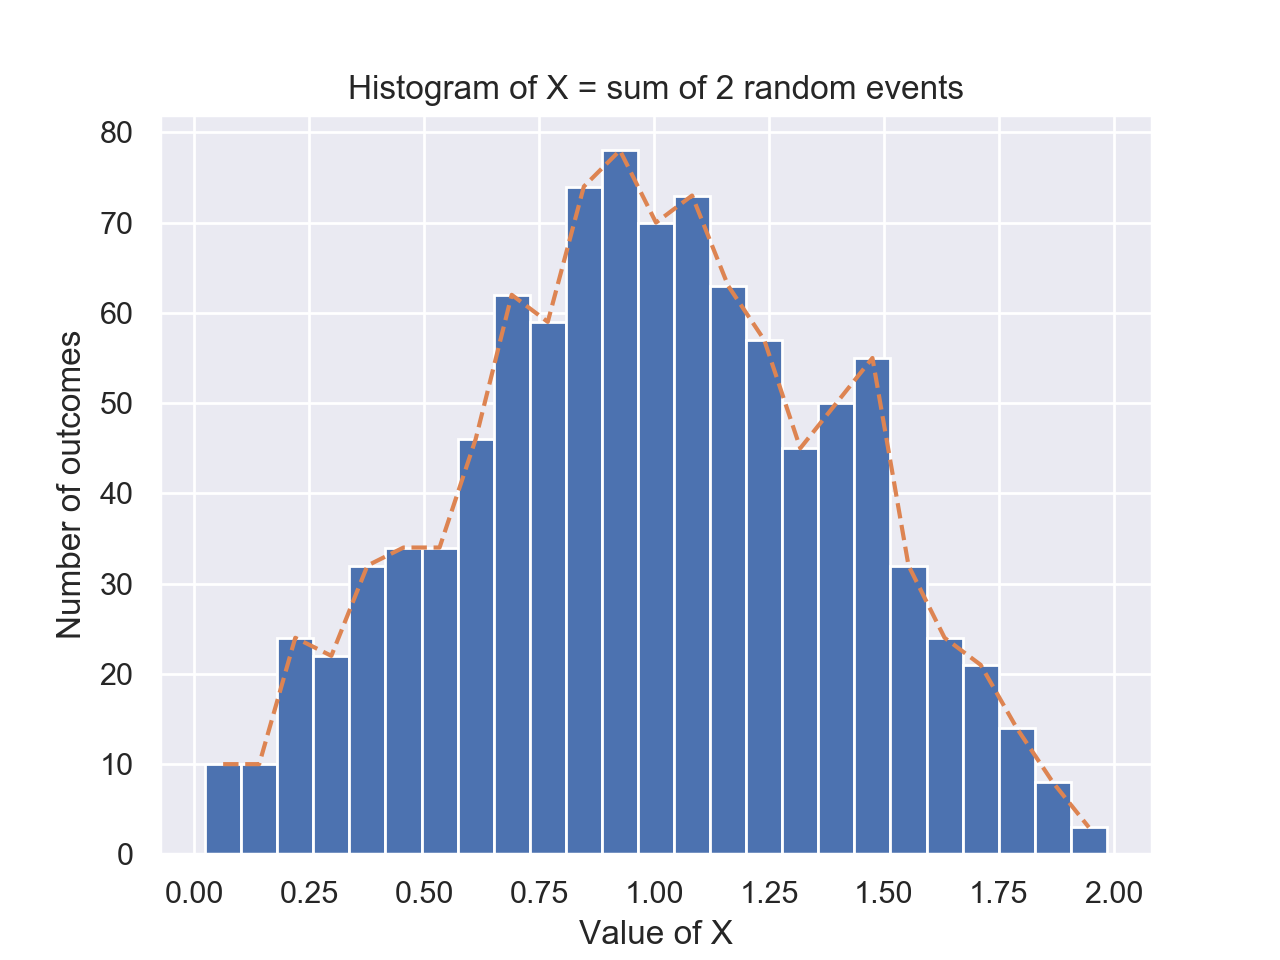

In [110]:
n = 1000 # no:of experiments
k = 2    # no:of random events
x = np.random.random_sample((n,k)) # each row will be 1000 runs of one experiment
X = np.sum(x, axis=1) # summing the outcomes of each run


plt.figure()
h = plt.hist(X, bins=25)
plt.ylabel('Number of outcomes')
plt.xlabel('Value of X')
plt.title('Histogram of X = sum of %s random events'%(k,))

mean_of_intervals = [(h[1][i]+h[1][i+1])/2 for i in range(len(h[1])-1)]
values_of_intervals = h[0]
plt.plot(mean_of_intervals, values_of_intervals, '--')

### Notations

* We define a random variable X as the numerical outcome of the random experiment both discrete and continuous.
* We denote the random variable by a capital letter, say X, and its possible values by a small letter, say xi for the discrete case and x for the continuous case.
* The number of experiments, which is sometimes referred to as the number of trials, will be denoted by M.
* The values of X obtained through simulation / experiment are termed the "outcomes" or "realizations" of X

<IPython.core.display.Javascript object>


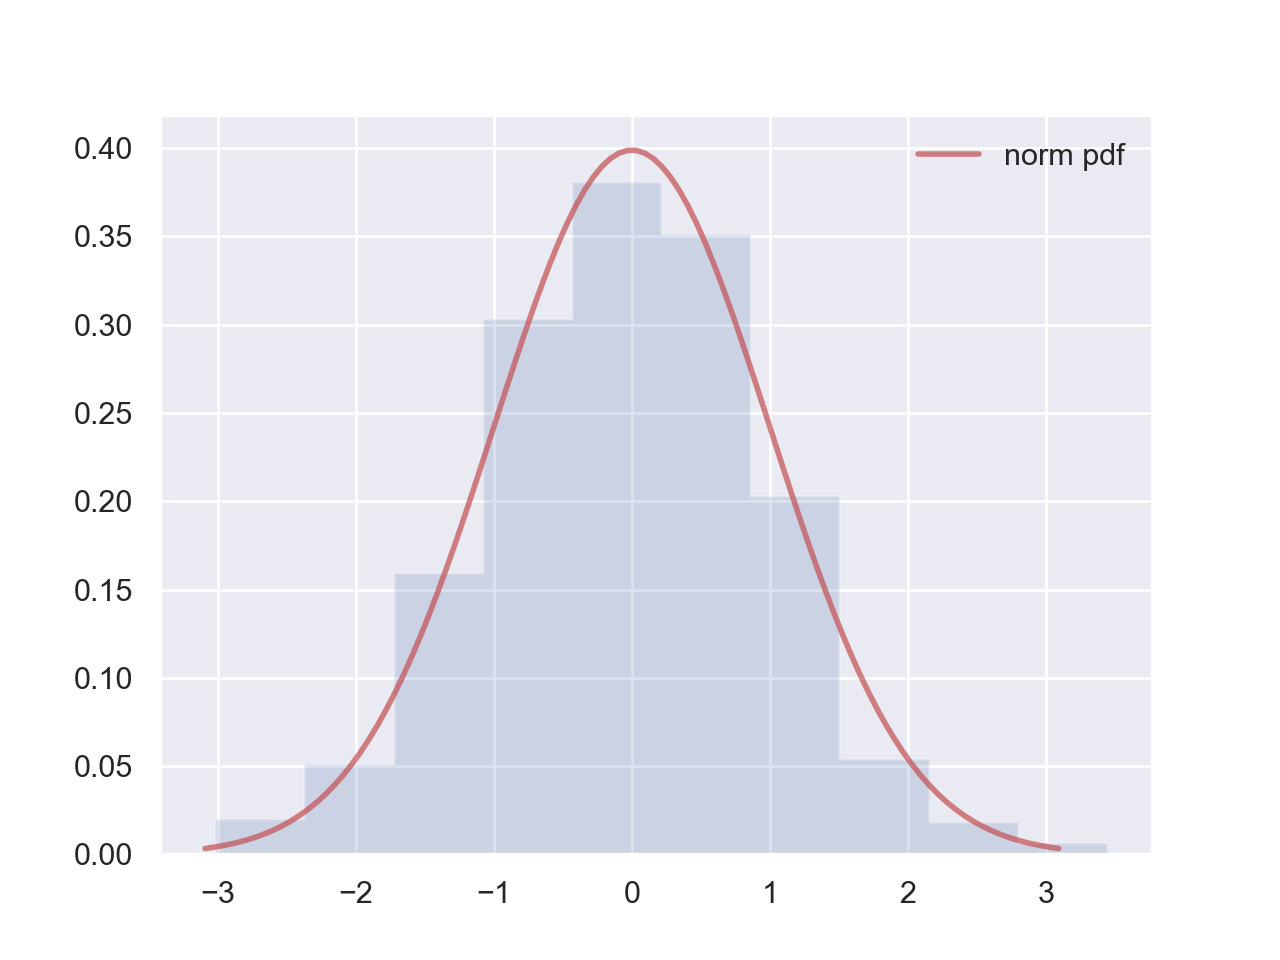

In [121]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

from scipy.stats import norm

# ppf(q, loc=0, scale=1) - Percent point function (inverse of cdf — percentiles).
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x), 'r-', lw=2, alpha=0.7, label='norm pdf')

# rvs(loc=0, scale=1, size=1, random_state=None) - Random variates.
r = norm.rvs(size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)